## Plot chains 

Notebook to plot chains run sampler object using chainconsumer. Here we look at the effect of leaving out the contribution from the emualtor covariance in the likelihood evaluation

In [1]:
import numpy as np
import emcee_sampler
from chainconsumer import ChainConsumer
import matplotlib.pyplot as plt

In [2]:
sampler_single_full = emcee_sampler.EmceeSampler(read_chain_file=1)
sampler_single_nocov = emcee_sampler.EmceeSampler(read_chain_file=16)

 /home/chris/.local/lib/python3.5/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (265000, 6)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (515000, 6)


In [3]:
chain_single_full,lnprob_single_full=sampler_single_full.get_chain(cube=False)
chain_single_nocov,lnprob_single=sampler_single_nocov.get_chain(cube=False)

In [4]:
## Function for prior
sigma=0.15
def prior(x):
    return (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-1)**2/(2*sigma**2))
    

In [5]:
## Generate prior data
x=np.linspace(0.5,1.5,500)
y=prior(x)

 /home/chris/.local/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning:Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


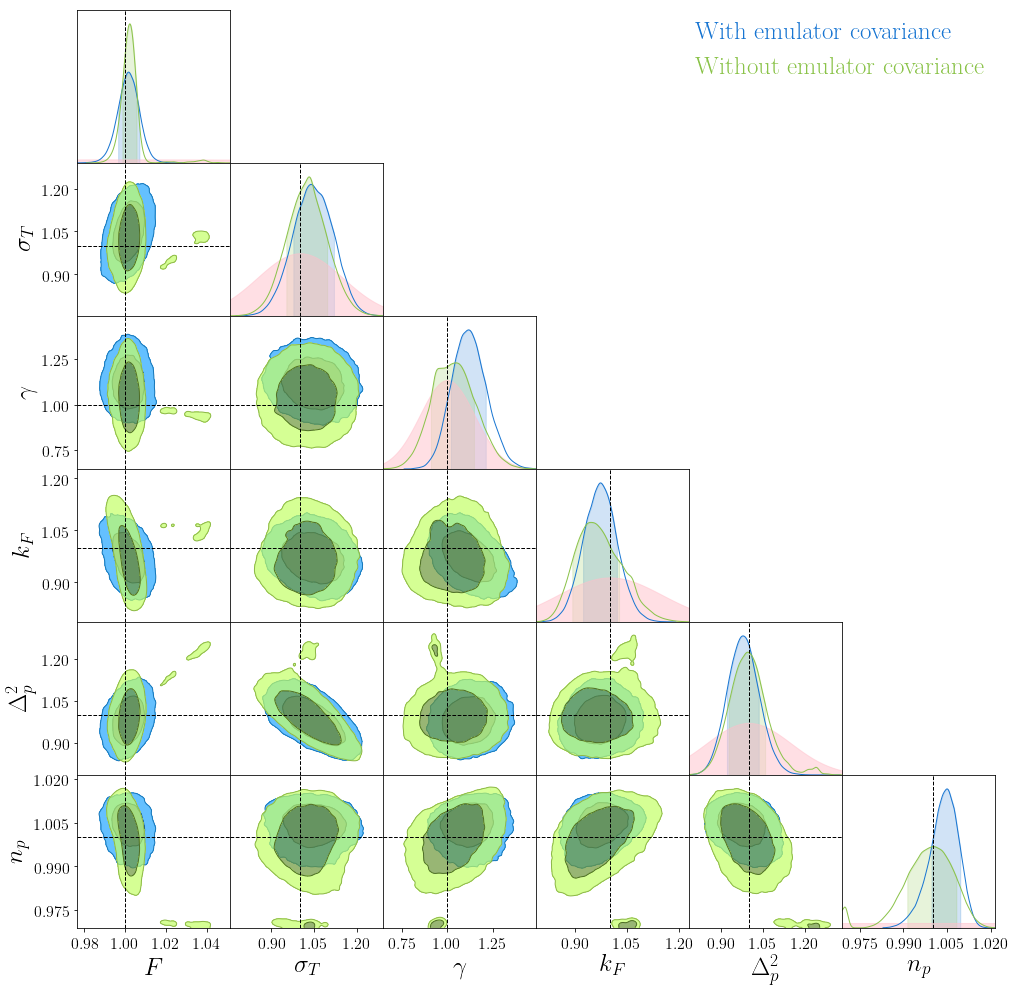

In [6]:
c=ChainConsumer()
c.add_chain(chain_single_full,parameters=sampler_single_full.paramstrings,name="With emulator covariance")
c.add_chain(chain_single_nocov,parameters=sampler_single_nocov.paramstrings,name="Without emulator covariance")
c.configure(diagonal_tick_labels=False, tick_font_size=16, label_font_size=25, max_ticks=4)
fig = c.plotter.plot(figsize=(15,15),truth=sampler_single_full.truth)
fig.axes[0].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[7].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[14].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[21].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[28].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[35].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.show()
fig.savefig("emu_cov.pdf")

In [7]:
print("Lowest n_p sample = ", min(chain_single_nocov[:,5]))
print("Argument of lowest n_p sample = ", np.argmin(chain_single_nocov[:,5]))
print("Length of chain = ", len(chain_single_nocov[:,5]))

Lowest n_p sample =  0.9687688633346823
Argument of lowest n_p sample =  419055
Length of chain =  515000


In [8]:
data,emu=sampler_single_full.like.get_covmats()

In [9]:
print(sampler_single_full.like.data.z)

[2.   2.25 2.5  2.75 3.25 3.5  3.75 4.  ]


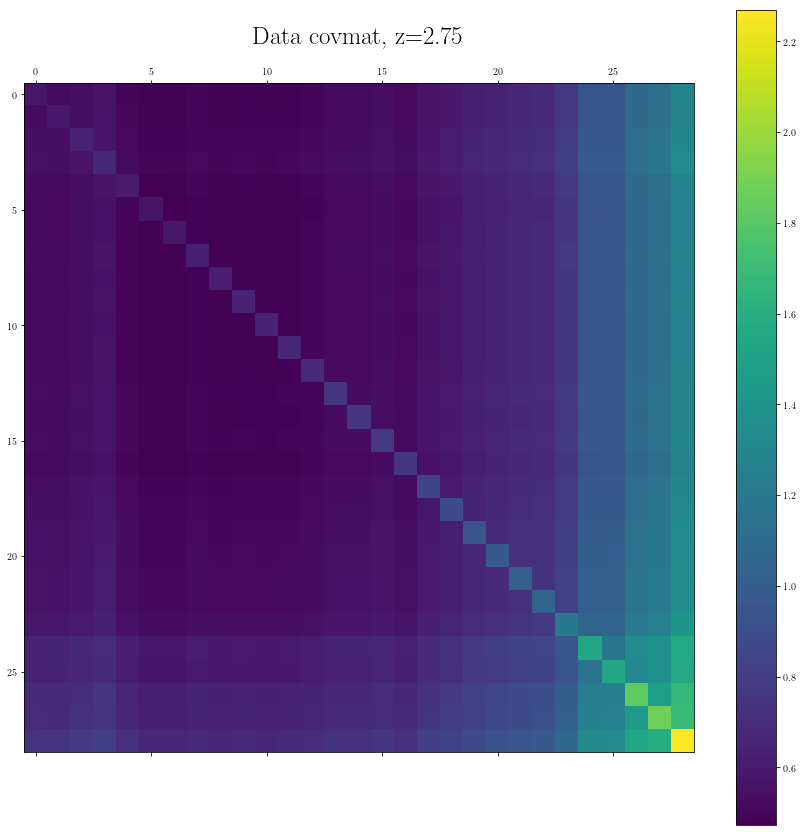

In [35]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax=ax.matshow(data[3])
plt.title("Data covmat, z=2.75",fontsize=25)
fig.colorbar(cax)
plt.savefig("data_cov.pdf")

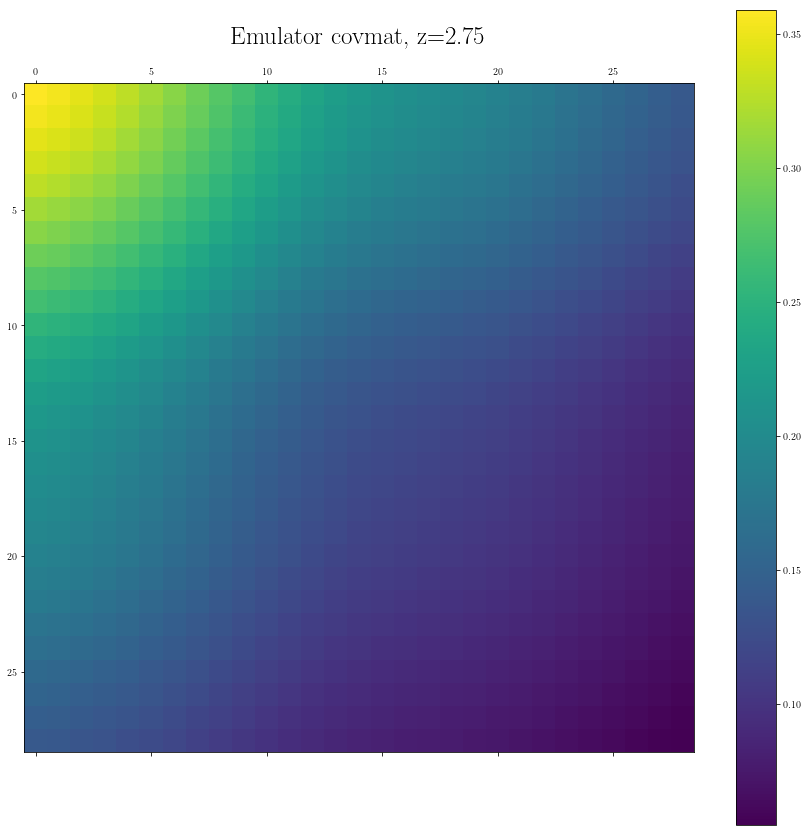

In [34]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
plt.title("Emulator covmat, z=2.75",fontsize=25)
cax=ax.matshow(emu[3])
fig.colorbar(cax)
plt.savefig("emu_covmat.pdf")

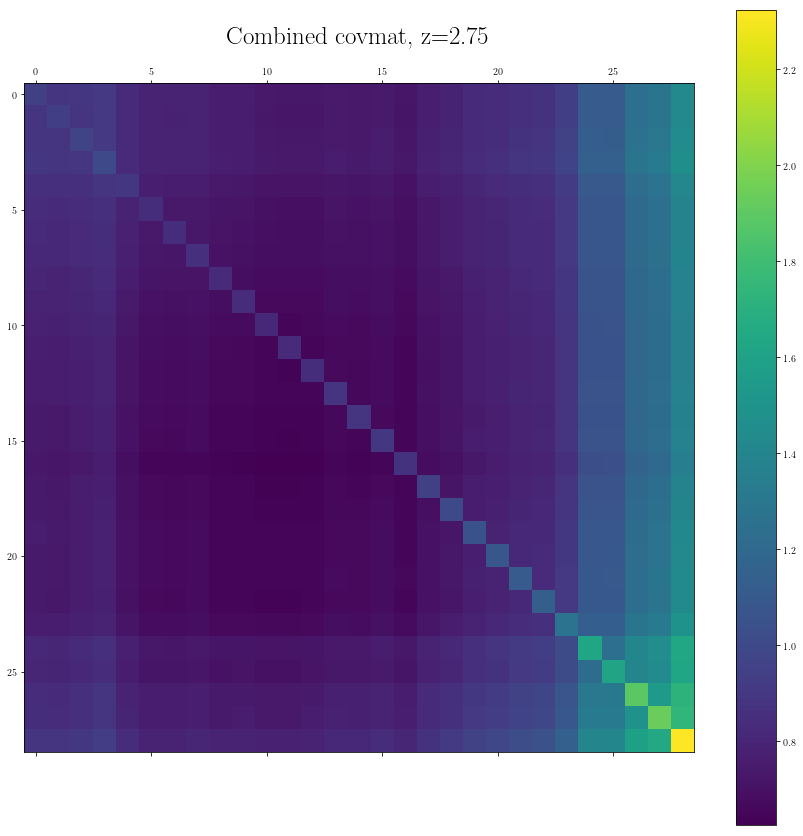

In [33]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
plt.title("Combined covmat, z=2.75",fontsize=25)
cax=ax.matshow(emu[3]+data[3])
fig.colorbar(cax)
plt.savefig("combined_covmat.pdf")

In [12]:
sampler_low = emcee_sampler.EmceeSampler(read_chain_file=19) ## 10% data covariance, without emu cov
sampler_low_nocov = emcee_sampler.EmceeSampler(read_chain_file=18) ## 10% data covariance, with emu cov

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
 /home/chris/.local/lib/python3.5/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (235000, 6)


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (405000, 6)


In [13]:
chain_low,_=sampler_low.get_chain(cube=False)
chain_low_nocov,_=sampler_low_nocov.get_chain(cube=False)

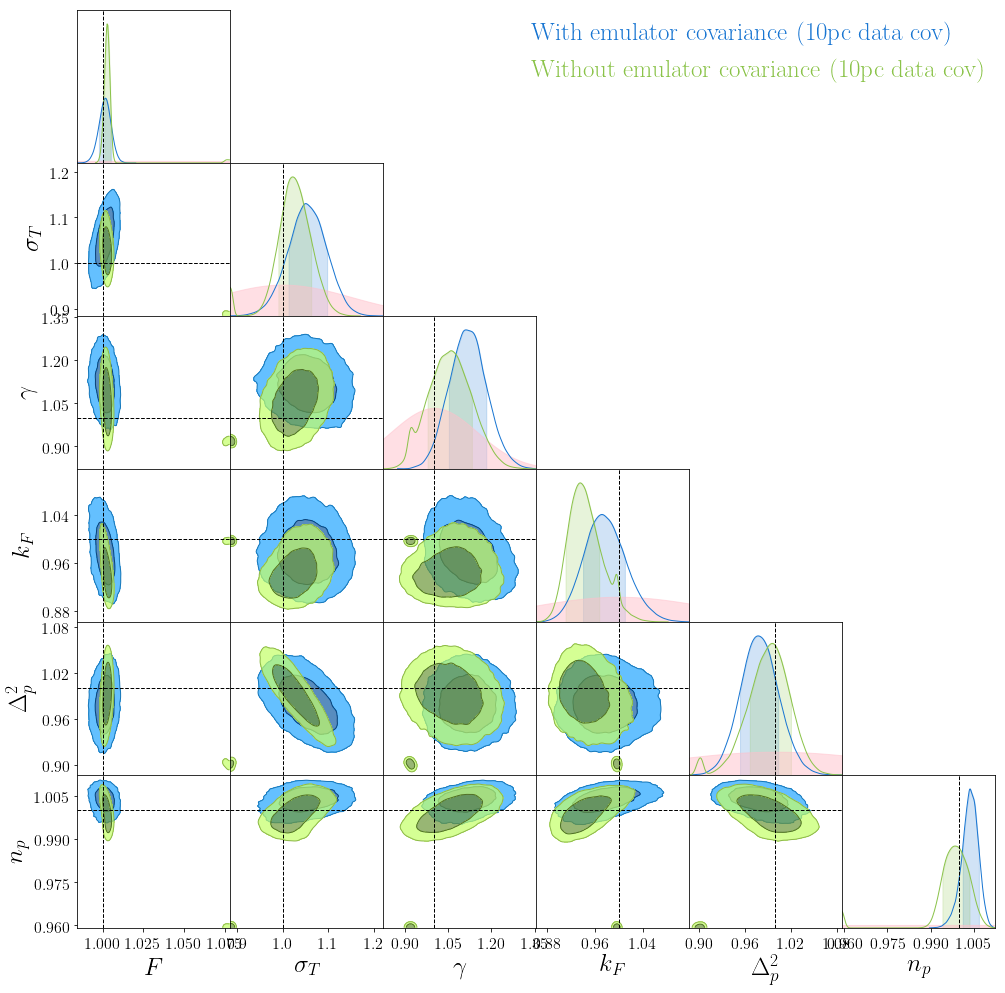

In [61]:
c=ChainConsumer()
c.add_chain(chain_low,parameters=sampler_low.paramstrings,name="With emulator covariance (10pc data cov)")
c.add_chain(chain_low_nocov,parameters=sampler_low_nocov.paramstrings,name="Without emulator covariance (10pc data cov)")
c.configure(diagonal_tick_labels=False, tick_font_size=16, label_font_size=25, max_ticks=4)
fig = c.plotter.plot(figsize=(15,15),truth=sampler_single_full.truth)
fig.axes[0].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[7].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[14].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[21].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[28].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[35].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.show()
fig.savefig("emu_cov_lowdatacov.pdf")

 /home/chris/.local/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning:Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


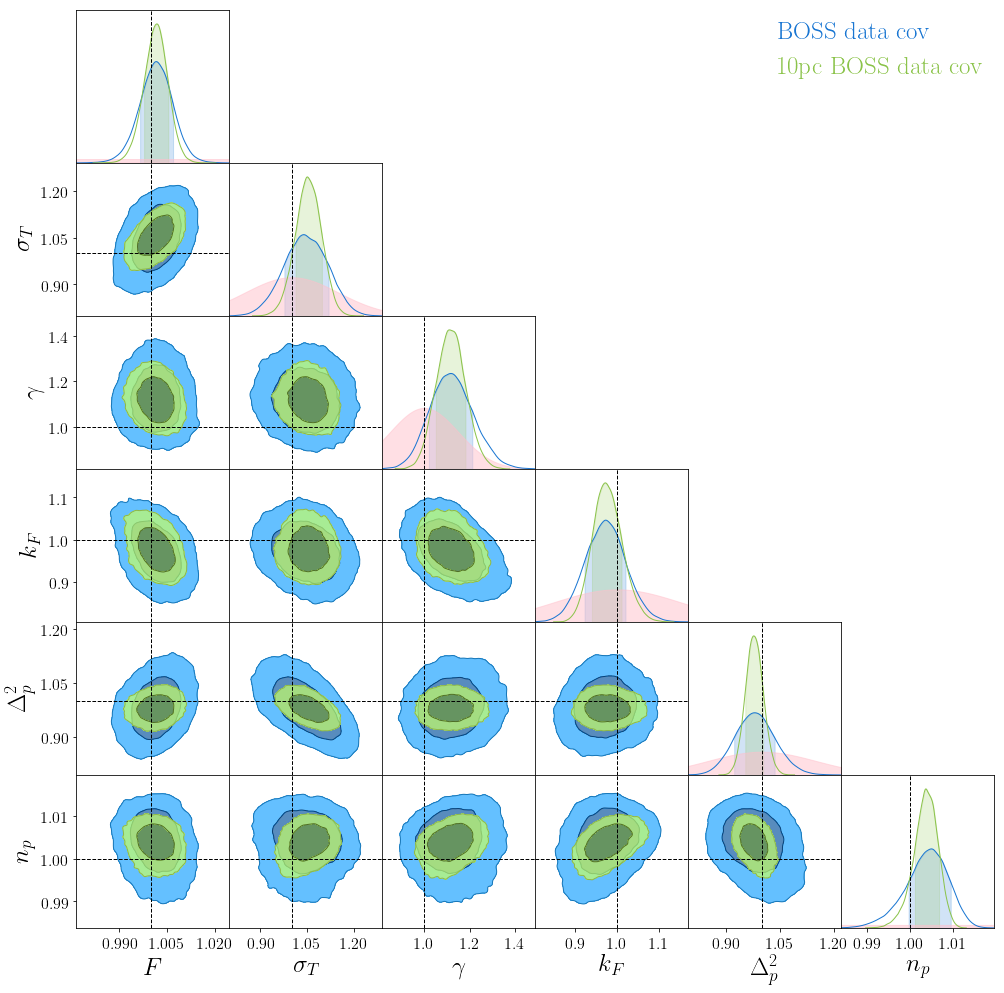

In [62]:
c=ChainConsumer()
c.add_chain(chain_single_full,parameters=sampler_single_full.paramstrings,name="BOSS data cov")
c.add_chain(chain_low,parameters=sampler_low.paramstrings,name="10pc BOSS data cov")
c.configure(diagonal_tick_labels=False, tick_font_size=16, label_font_size=25, max_ticks=4)
fig = c.plotter.plot(figsize=(15,15),truth=sampler_single_full.truth)
fig.axes[0].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[7].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[14].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[21].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[28].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.axes[35].fill_between(x,0,y,linestyle="solid",color="pink",alpha=0.5)
fig.show()
fig.savefig("emu_cov_BOSS_DESI.pdf")

In [15]:
data_low,emu_low=sampler_low.like.get_covmats()

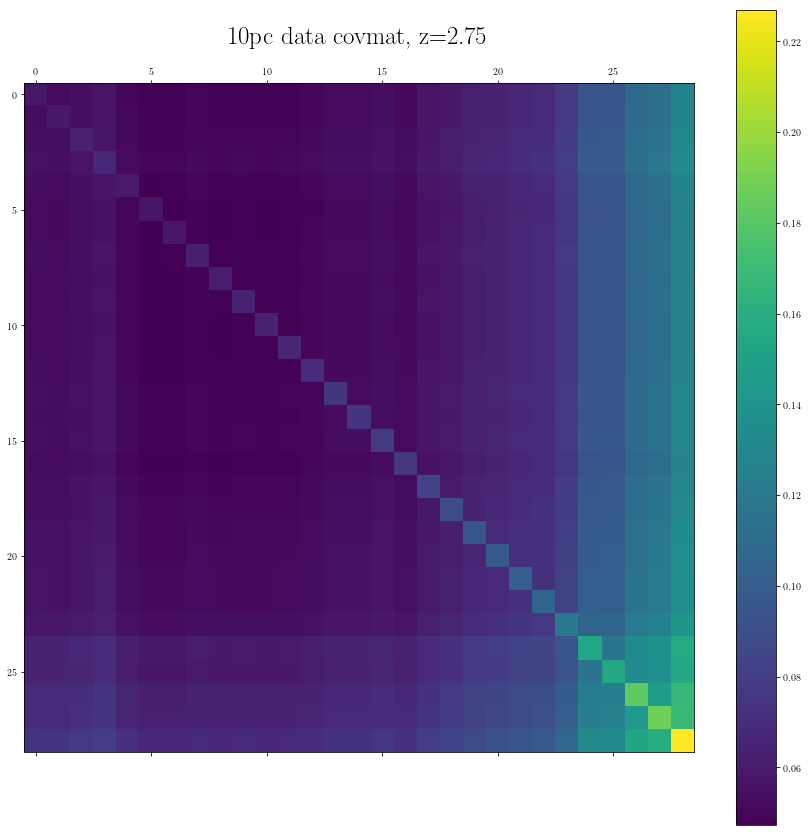

In [30]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax=ax.matshow(data_low[3])
plt.title("10pc data covmat, z=2.75",fontsize=25)
fig.colorbar(cax)
plt.savefig("10pc_data.pdf")

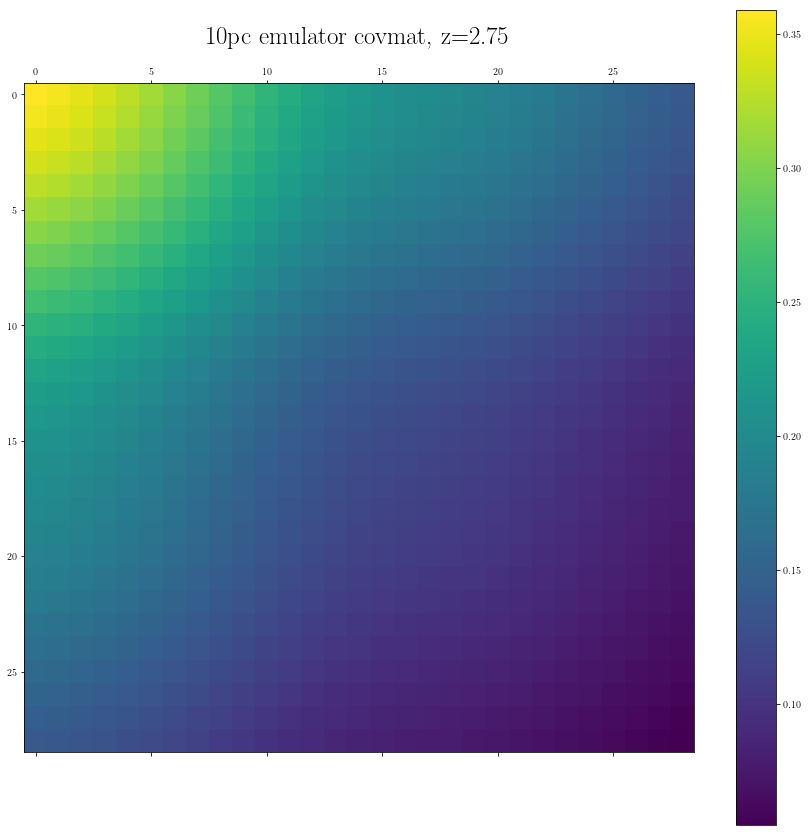

In [17]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
plt.title("10pc data cov, emulator covmat, z=2.75",fontsize=25)
cax=ax.matshow(emu_low[3])
fig.colorbar(cax)

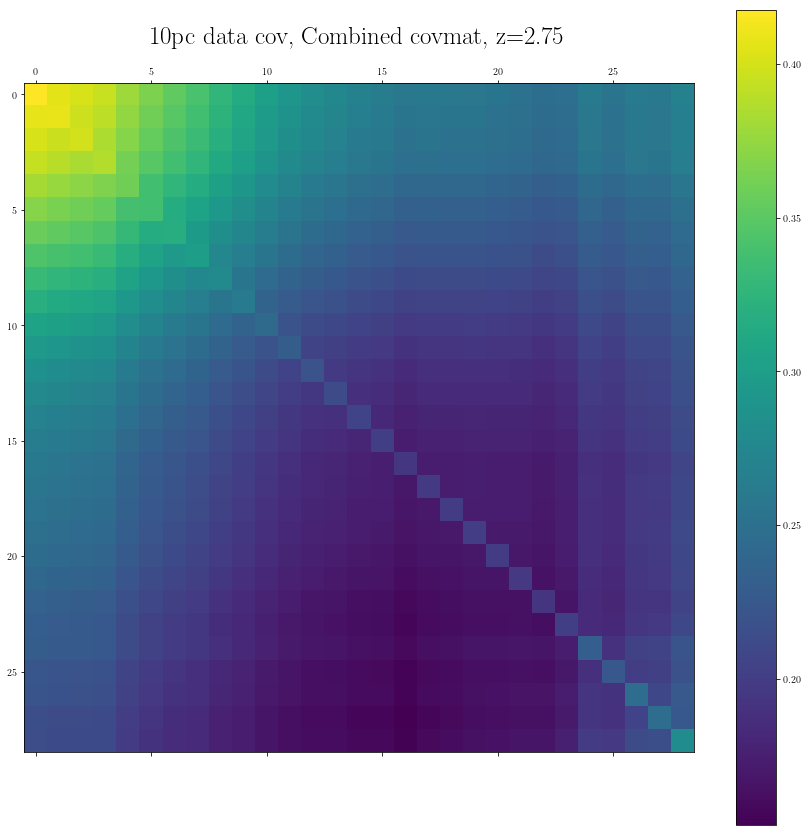

In [31]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
plt.title("10pc data cov, Combined covmat, z=2.75",fontsize=25)
cax=ax.matshow(emu_low[3]+data_low[3])
fig.colorbar(cax)
plt.savefig("10pc_combined.pdf")

In [53]:
## Log like scan
npoints=500
vals=np.linspace(0.45,0.55,npoints)

values=[0.5,0.5,0.5,0.5,0.5,0.5]
normal_emucov=np.empty(npoints)
normal_noemu=np.empty(npoints)
reduced_emucov=np.empty(npoints)
reduced_noemu=np.empty(npoints)

normal_emucov_chi=np.empty(npoints)
normal_noemu_chi=np.empty(npoints)
reduced_emucov_chi=np.empty(npoints)
reduced_noemu_chi=np.empty(npoints)

In [24]:
for aa in range(npoints):
    values[0]=vals[aa]
    normal_emucov[aa]=sampler_single_full.like.get_log_like(values)
    normal_noemu[aa]=sampler_single_nocov.like.get_log_like(values)
    reduced_emucov[aa]=sampler_low.like.get_log_like(values)
    reduced_noemu[aa]=sampler_low_nocov.like.get_log_like(values)

In [25]:
sampler_low_nocov.like.emu_cov_factor

0.0

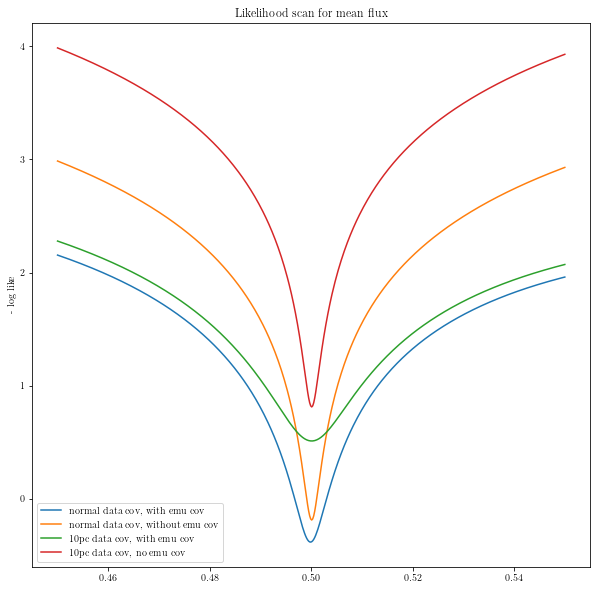

In [39]:
plt.figure(figsize=(10,10))
plt.title("Likelihood scan for mean flux")
plt.plot(vals,np.log10(-normal_emucov),label="normal data cov, with emu cov")
plt.plot(vals,np.log10(-normal_noemu),label="normal data cov, without emu cov")
plt.plot(vals,np.log10(-reduced_emucov),label="10pc data cov, with emu cov")
plt.plot(vals,np.log10(-reduced_noemu),label="10pc data cov, no emu cov")
plt.ylabel("- log like")
plt.legend()
plt.savefig("likelihood_scan_mf.pdf")

In [54]:
for aa in range(npoints):
    values[4]=vals[aa]
    normal_emucov[aa]=sampler_single_full.like.get_log_like(values,ignore_log_det_cov=False)
    normal_emucov_chi[aa]=sampler_single_full.like.get_chi2(values)
    normal_noemu[aa]=sampler_single_nocov.like.get_log_like(values,ignore_log_det_cov=False)
    normal_noemu_chi[aa]=sampler_single_nocov.like.get_chi2(values)
    reduced_emucov[aa]=sampler_low.like.get_log_like(values,ignore_log_det_cov=False)
    reduced_emucov_chi[aa]=sampler_low.like.get_chi2(values)
    reduced_noemu[aa]=sampler_low_nocov.like.get_log_like(values,ignore_log_det_cov=False)
    reduced_noemu_chi[aa]=sampler_low_nocov.like.get_chi2(values)

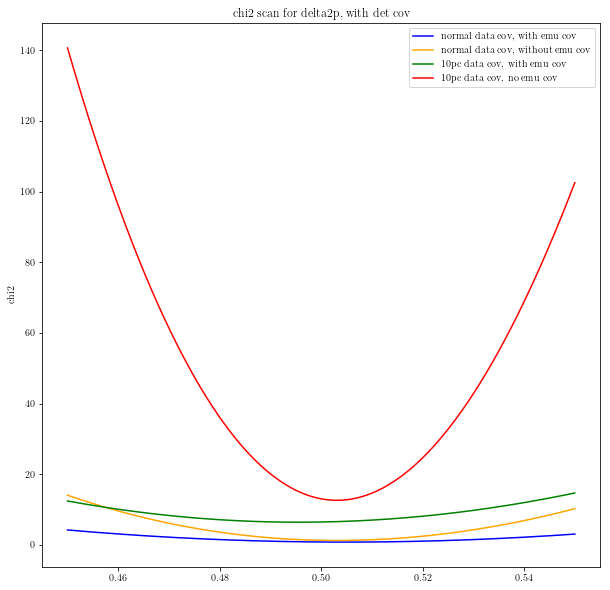

In [55]:
plt.figure(figsize=(10,10))
plt.title("chi2 scan for delta2p, with det cov")
plt.plot(vals,normal_emucov_chi,label="normal data cov, with emu cov",color="blue")
plt.plot(vals,normal_noemu_chi,label="normal data cov, without emu cov",color="orange")
plt.plot(vals,reduced_emucov_chi,label="10pc data cov, with emu cov",color="green")
plt.plot(vals,reduced_noemu_chi,label="10pc data cov, no emu cov",color="red")
plt.ylabel("chi2")
plt.legend()
plt.savefig("chi2_scan_linp.pdf")

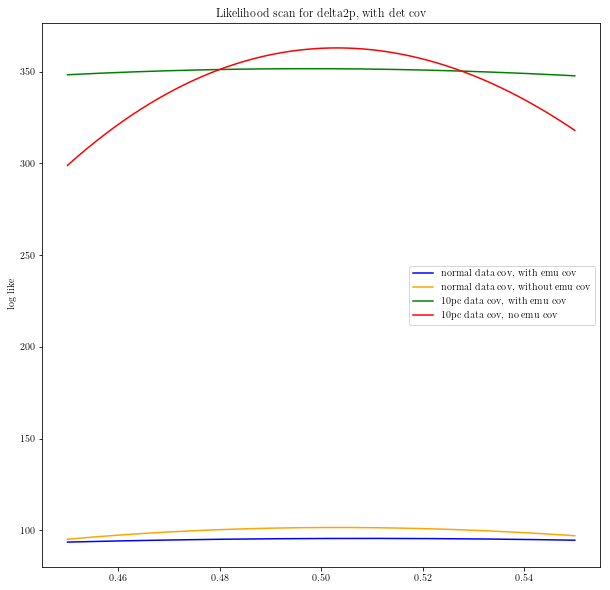

In [59]:
plt.figure(figsize=(10,10))
plt.title("Likelihood scan for delta2p, with det cov")
plt.plot(vals,normal_emucov,label="normal data cov, with emu cov",color="blue")
plt.plot(vals,normal_noemu,label="normal data cov, without emu cov",color="orange")
plt.plot(vals,reduced_emucov,label="10pc data cov, with emu cov",color="green")
plt.plot(vals,reduced_noemu,label="10pc data cov, no emu cov",color="red")
plt.ylabel("log like")
plt.legend()
plt.savefig("likelihood_scan_linp.pdf")

In [ ]:
419055/515000

In [ ]:
print(chain_single_nocov[0])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.hist((chain_single_nocov[0:2000].flatten()))

In [ ]:
#cov_mat=np.outer(chain_single_full,rowvar=False)

In [ ]:
cov_mat=np.cov(chain_single_full,rowvar=False)

In [ ]:
np.shape(chain_single_full[10000:50000])

In [ ]:
parlist=sampler_single_full.like.free_parameters

In [ ]:
print(parlist)

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax=ax.matshow(cov_mat)
fig.colorbar(cax)
fig.savefig("covmat.pdf")
#ax.set_xticklabels([""]+parlist)
#ax.set_yticklabels([""]+parlist)

In [ ]:
corr_mat=np.cov(chain_single_full,rowvar=False)

In [ ]:
for aa in range(6):
    for bb in range(6):
        corr_mat[aa][bb]=corr_mat[aa][bb]/np.sqrt(cov_mat[aa][aa]*cov_mat[bb][bb])

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax=ax.matshow(corr_mat)
fig.colorbar(cax)
fig.savefig("correlation_matrix.pdf")